In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
#no null value
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#we have two classification,either the mushroom is poisonous or edible
data["class"].unique()

array(['p', 'e'], dtype=object)

In [6]:
data.shape

(8124, 23)

In [7]:
#so we have 22 features and 1st is label,and 8124 instances.Now let us check 
#which features constitutes maximum information.
# the dataset has values in strings.We need to convert all the unique values to integers.Thus 
# we perform label encoding on the data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
#check the encoding values
data["stalk-color-above-ring"].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [9]:
data.groupby("class").size()

class
0    4208
1    3916
dtype: int64

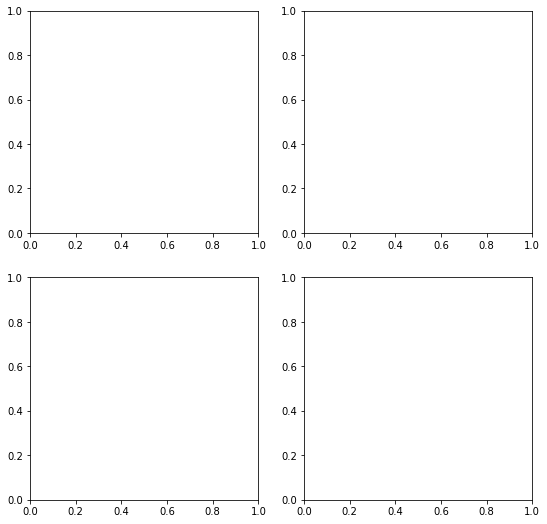

In [170]:
#Plotting boxplot to see the distribution of data
#Create a figure instance创建一个图形实例
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 9))

AttributeError: module 'seaborn' has no attribute 'plt'

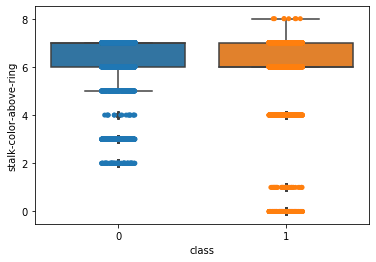

In [11]:
#Create an axes instance and the boxplot 创建坐标轴和箱线图
bp1 = axes[0,0].boxplot(data["stalk-color-above-ring"], patch_artist = True)
bp2 = axes[0,1].boxplot(data["stalk-color-below-ring"], patch_artist = True)
bp3 = axes[1,0].boxplot(data["stalk-surface-below-ring"], patch_artist = True)
bp4 = axes[1,1].boxplot(data["stalk-surface-above-ring"], patch_artist = True)
ax = sns.boxplot(x = "class", y = "stalk-color-above-ring", data = data)
ax = sns.stripplot(x = "class", y = "stalk-color-above-ring", data = data, jitter = True,
                   edgecolor = "grey")
sns.plt.title("Class w.r.t stalkcolor above ring", fontsize = 12)

In [12]:
#分开label和features
x = data.iloc[:, 1:23] #all rows with all features without index
y = data.iloc[:, 0] #all rows of index
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [14]:
x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [15]:
y.describe()

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

In [16]:
#相关系数
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Standardising the data

In [17]:
#scalethe features' data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

## PCA


In [18]:
#we can avoid PCA cuz the dataset is too small
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -2.98716006e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  8.17047124e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  3.62451933e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  1.31607921e-18],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -7.47641463e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  1.39554149e-19]])

In [19]:
#covariance 协方差
covariance = pca.get_covariance()

In [20]:
#不要忽略_
explained_variance = pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 2.78307611e-33])

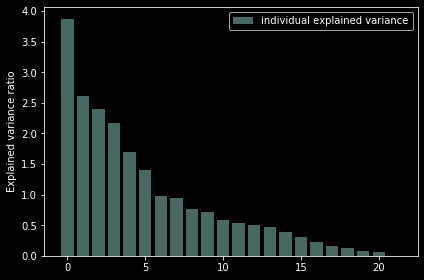

In [21]:
with plt.style.context("dark_background"):
    plt.figure(figsize = (6, 4)) #width high
    plt.bar(range(22), explained_variance, alpha = 0.5, align = "center",
           label = "individual explained variance")
    plt.ylabel("Explained variance ratio")
    plt.legend(loc = "best")
    plt.tight_layout()

In [ ]:
# we can see the last 4 components has less amount of variance of the data.
#The 1st 17 components retains more than 90% of the data

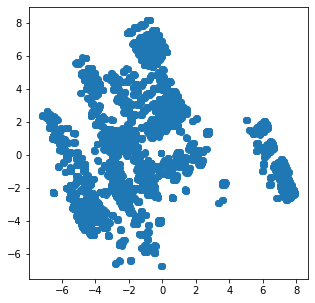

In [22]:
#Let us take only first two principal components and visualise it using K-means clustering
N = data.values
pca = PCA(n_components = 2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0], x[:,1])
plt.show()

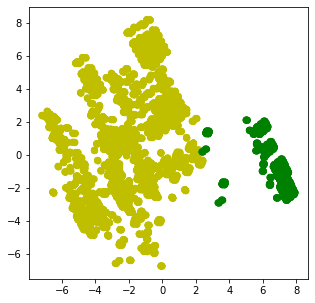

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : "g",
                   1 : "y"}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0], x[:,1], c = label_color)
plt.show()

In [ ]:
#Thus usining K-means we are able segregate 2 classes well using the first two components with max variance
#使用K均值，我们可以使用方差最大的前两个成分很好地隔离2类。
PCA(n_components = 2)

# Performing PCA by taking 17 components with maximum Variance

In [24]:
pca_modified = PCA(n_components = 17)
pca_modified.fit_transform(x)

ValueError: n_components=17 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

# Default Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [27]:
#Splitting the data into training and testing dataset数据分为test和train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [28]:
model_LR.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#this will give us positive class prediction probabilities
y_prob = model_LR.predict_proba(x_test)[:,1]

In [30]:
#this will threshold the probabilities to give class predictions
y_pred = np.where(y_prob > 0.5, 1, 0)

In [31]:
model_LR.score(x_test, y_pred)

1.0

In [32]:
#混淆矩阵
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[629, 216],
       [196, 584]])

In [33]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.7465483234714004

In [34]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8370232134729175

Text(0.5, 0, 'False Positive Rate')

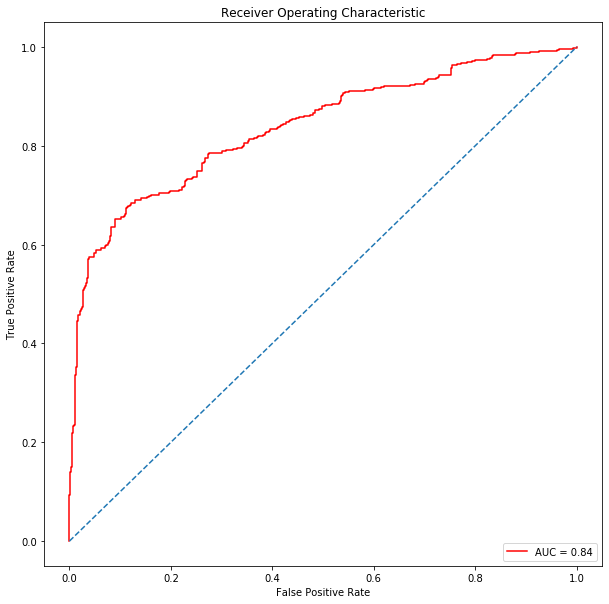

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color = "red",
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Logistic Regression(Tuned model)调整模型

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
LR_model = LogisticRegression()

In [37]:
tuned_parameters = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   "penalty" : ["l1", "l2"]}
#L1和L2是正则化参数，它们用于避免过度拟合.L1和L2均正则化通过缩小系数（施加惩罚）penalty来防止过度拟合。
#L1是第一刻矩| x1-x2 | （| w |对于正则化情况）就是两个点之间的绝对距离，其中L2是对应于欧氏距离Eucledian Distance的第二矩范数，即| x1-x2 | ^ 2（对于正则化情况|| w | ^ 2）。
#简而言之，L2（Ridge）将所有系数按相同比例缩小，但没有消除，而L1（Lasso）可以将某些系数缩小为零，从而执行变量选择。 如果所有特征都与标签相关联，则脊的性能将优于套索，因为脊中的系数永远不会为零。 如果仅特征的子集与标签相关，套索的性能将优于脊，因为套索模型中的某些系数可以缩小为零。


In [38]:
# Taking a look at the correlation
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [40]:
from sklearn.model_selection import GridSearchCV
LR =GridSearchCV(LR_model, tuned_parameters, cv = 10)
#GridSearchCV提供的网格搜索从通过调整后的参数指定的参数值网格中详尽地生成候选。
#GridSearchCV实例实现了常用的估算器API：将其“拟合”到数据集时，将评估所有可能的参数值组合，并确定最佳参数组合被保留。

In [41]:
LR.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
LR.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [43]:
#this will give us positive class prediction probabilities这将给我们正面的类预测概率
y_prob = LR.predict_proba(x_test)[:, 1]

In [44]:
#this will threshold the probabilities to give class predictions这将限制给出聚类预测的可能性
y_pred = np.where(y_prob > 0.5, 1, 0)

In [45]:
LR.score(x_test, y_pred)

1.0

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[623, 222],
       [190, 590]])

In [47]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.77      0.74      0.75       845\n           1       0.73      0.76      0.74       780\n\n    accuracy                           0.75      1625\n   macro avg       0.75      0.75      0.75      1625\nweighted avg       0.75      0.75      0.75      1625\n'

In [48]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.7468441814595661

In [49]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8361553633742982

Text(0.5, 0, 'False Positive Rate')

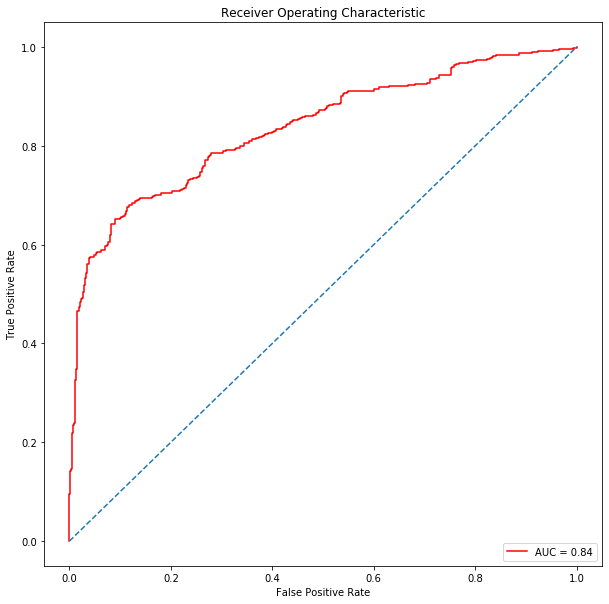

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("Receiver Operating Characteristic")#接收器工作特性
plt.plot(false_positive_rate, true_positive_rate, color = "red",
         label = "AUC = %0.2F" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [51]:
LR_ridge = LogisticRegression(penalty = "l2")
LR_ridge.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#this will give us positive class prediction probabilities
y_prob = LR_ridge.predict_proba(x_test)

In [53]:
#this will threshold the probabilities to give class predictions
y_pred = np.where(y_prob > 0.5, 1, 0)

In [55]:
LR_ridge.score(x_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

## Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
#this will give us positive class prediction probabilities
y_prob = model_naive.predict_proba(x_test)[:, 1]

In [58]:
#this will threshold the probabilities to give class predictions
y_pred = np.where(y_prob > 0.5, 1, 0)

In [59]:
model_naive.score(x_test, y_pred)

1.0

In [60]:
"Number of mislabeled points from %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum())

'Number of mislabeled points from 1625 points : 365'

In [61]:
#cross validation通过交叉验证做估计
scores = cross_val_score(model_naive, x, y, cv = 10, scoring = "accuracy")
scores

array([0.37884379, 0.57441574, 0.71217712, 0.71217712, 0.7195572 ,
       0.78474785, 0.99753695, 0.99630542, 0.81134402, 0.88779285])

In [62]:
scores.mean()

0.757489805178433

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[684, 161],
       [204, 576]])

In [64]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.77      0.81      0.79       845\n           1       0.78      0.74      0.76       780\n\n    accuracy                           0.78      1625\n   macro avg       0.78      0.77      0.77      1625\nweighted avg       0.78      0.78      0.77      1625\n'

In [65]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.7739644970414201

In [66]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8445577302382036

Text(0.5, 0, 'False Positive Rate')

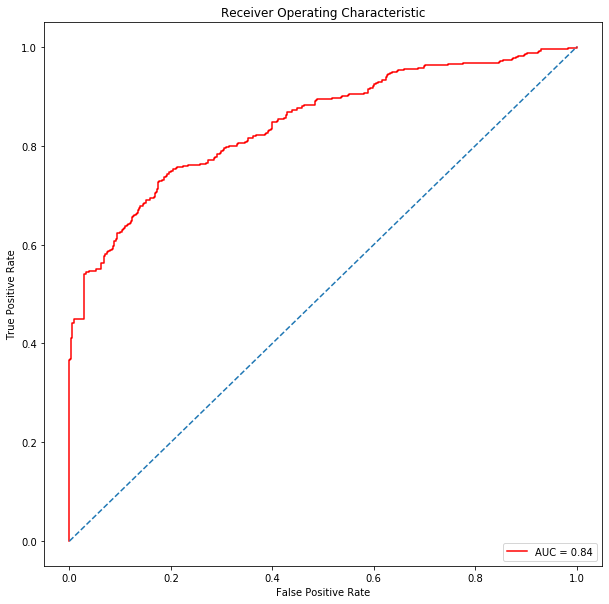

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color = "red", 
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Support Vector Machine

In [68]:
from sklearn.svm import SVC
svm_model = SVC()
#The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
#The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.
#gamma参数定义单个训练示例的影响力达到的程度，低值表示“远”，高值表示“接近”。 伽玛参数可以看作是模型选择的样本作为支持向量的影响半径的倒数。
#C参数权衡了训练示例的错误分类和决策面的简单性。 较低的C可使决策表面平滑，而较高的C则通过给予模型选择更多样本作为支持向量的自由度，旨在正确分类所有训练示例。

## Support Vector Machine without polynomial kernel

In [69]:
 #"degree" : [2,3,4,5,6],"C":[1,10,100,500,1000],'kernel':["poly"] 设置参数
tuned_parameters = {"C" : [1, 10, 100, 500, 1000], "kernel" : ["linear", "rbf"],
                    "C" : [1, 10, 100, 500, 1000], "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
                     "kernel" : ["rbf"]
                   }

In [70]:
#GridSearchCV提供的网格搜索从使用tuned_parameter **指定的参数值网格中详尽地生成候选。GridSearchCV实例实现了常用的估算器API：将其“拟合”到数据集时，将评估所有可能的参数值组合，保留最佳组合。但这在计算上证明是昂贵的，因此我选择RandomizedSearchCV。
#RandomizedSearchCV实现对参数的随机搜索，其中每个设置都是从可能的参数值的分布中采样的。与详尽搜索相比，这有两个主要好处：1）可以独立于参数数量和可能的值来选择预算。 2）添加不影响性能的参数不会降低效率
from sklearn.model_selection import RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [71]:
model_svm

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'C': [1, 10, 100, 500, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
model_svm.fit(x_train, y_train)
model_svm.best_score_

In [73]:
model_svm.grid_scores_

AttributeError: 'RandomizedSearchCV' object has no attribute 'grid_scores_'

In [74]:
model_svm.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [75]:
y_pred = model_svm.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Trying default model

In [77]:
from sklearn.ensemble import RandomForestClassifier
model_RR = RandomForestClassifier()

In [78]:
model_RR.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_prob = model_RR.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_RR.score(x_test, y_pred)

1.0

In [84]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[815,  30],
       [ 36, 744]])

In [85]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96       845\n           1       0.96      0.95      0.96       780\n\n    accuracy                           0.96      1625\n   macro avg       0.96      0.96      0.96      1625\nweighted avg       0.96      0.96      0.96      1625\n'

In [86]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9591715976331362

In [91]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
#auc()计算auc的code

Text(0.5, 0, 'False Positive Rate')

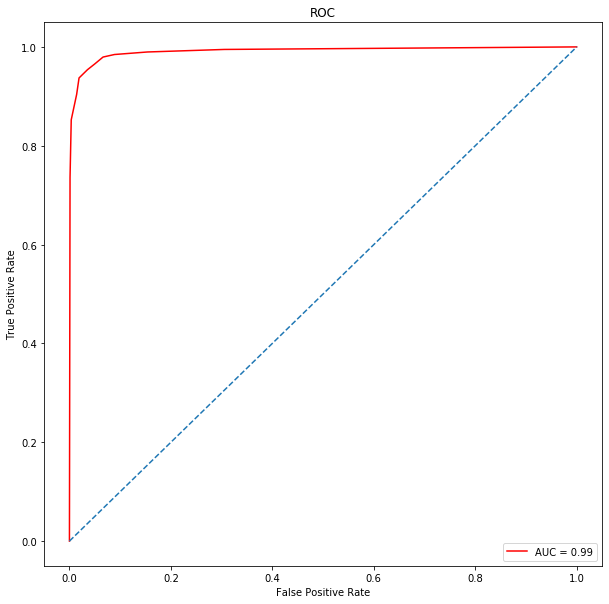

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate, color = "red",
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")


In [93]:
# adjusted RR model
from sklearn.ensemble import RandomForestClassifier
model_RR = RandomForestClassifier()

tuned_parameters = {"min_samples_leaf" : range(10, 100, 10), "n_estimators" : range(10, 100, 10),
                    "max_features" : ["auto", "sqrt", "log2"]
                    }

In [94]:
from sklearn.model_selection import RandomizedSearchCV
RR_model = RandomizedSearchCV(model_RR, tuned_parameters, cv = 10, 
                              scoring = "accuracy", n_iter = 20, n_jobs = -1)

In [95]:
RR_model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [99]:
#RR_model.grid_scores_
RR_model.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                          

In [100]:
RR_model.best_score_

0.9141406370210802

In [101]:
RR_model.best_params_

{'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}

In [104]:
y_prob = RR_model.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
RR_model.score(x_test, y_pred)

1.0

In [105]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[793,  52],
       [ 80, 700]])

In [106]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.91      0.94      0.92       845\n           1       0.93      0.90      0.91       780\n\n    accuracy                           0.92      1625\n   macro avg       0.92      0.92      0.92      1625\nweighted avg       0.92      0.92      0.92      1625\n'

In [107]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9179487179487179

In [108]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.979585040206342

Text(0.5, 0, 'False Positive Rate')

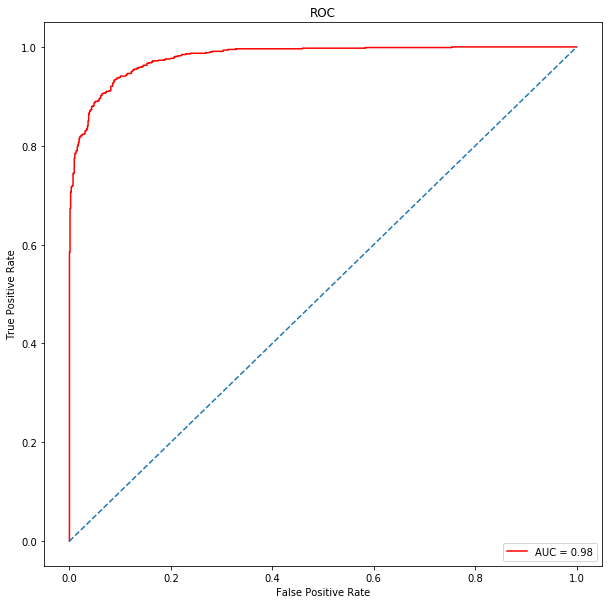

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate, color = "red",
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Degault Decision Tree model

In [110]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [111]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
y_prob = model_tree.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_tree.score(x_test, y_pred)

1.0

In [115]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[809,  36],
       [ 42, 738]])

In [116]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95       845\n           1       0.95      0.95      0.95       780\n\n    accuracy                           0.95      1625\n   macro avg       0.95      0.95      0.95      1625\nweighted avg       0.95      0.95      0.95      1625\n'

In [117]:
auc_roc=metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9517751479289941

In [118]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

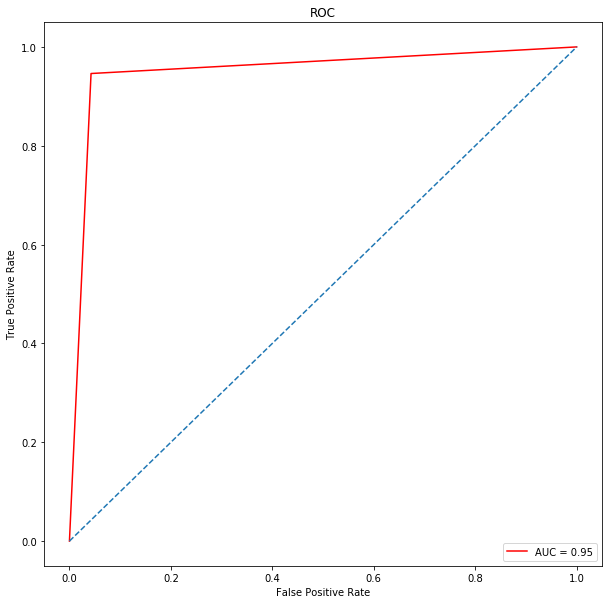

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate, color = "red",
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [123]:
#tuned this model criterion标准 
from sklearn.tree import DecisionTreeClassifier
model_DD = DecisionTreeClassifier()
tuned_parameters = {"criterion" : ["gini", "entropy"], 
                    "max_features" : ["auto", "sqrt", "log2"],
                    "min_samples_leaf" : range(1, 100, 1), "max_depth" : range(1, 50, 1)}

In [124]:
from sklearn.model_selection import RandomizedSearchCV
DD_model = RandomizedSearchCV(model_DD, tuned_parameters, cv = 10,
                              scoring = "accuracy", n_iter = 20, n_jobs = -1, random_state = 5)


In [125]:
DD_model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [135]:
DD_model.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                               

In [129]:
DD_model.best_params_

{'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 31,
 'criterion': 'entropy'}

In [130]:
DD_model.best_score_

0.893214340667795

In [133]:
y_prob = DD_model.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [134]:
DD_model.score(x_test, y_pred)

1.0

In [136]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[767,  78],
       [101, 679]])

In [137]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.88      0.91      0.90       845\n           1       0.90      0.87      0.88       780\n\n    accuracy                           0.89      1625\n   macro avg       0.89      0.89      0.89      1625\nweighted avg       0.89      0.89      0.89      1625\n'

In [138]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.8891025641025642

## Neural Network

In [139]:
#apply default Neural Network model
from sklearn.neural_network import MLPClassifier

In [141]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [144]:
y_prob = mlp.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
mlp.score(x_test, y_pred)

1.0

In [145]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[736, 109],
       [116, 664]])

In [146]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.87       845\n           1       0.86      0.85      0.86       780\n\n    accuracy                           0.86      1625\n   macro avg       0.86      0.86      0.86      1625\nweighted avg       0.86      0.86      0.86      1625\n'

In [147]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.8611439842209073

In [148]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.923236231224397

Text(0.5, 0, 'False Positive Rate')

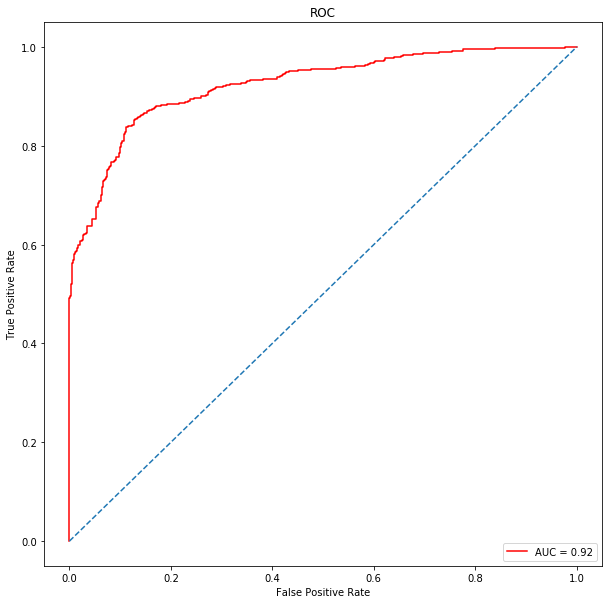

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate, color = "red", 
         label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [150]:
# tuned the hyperparameters of the NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
tuned_parameters = {"hidden_layer_sizes" : range(1, 200, 10),
                    "activation" : ["tanh", "logistic", "relu"],
                    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "max_iter" : range(50, 200, 50)}

In [153]:
from sklearn.model_selection import RandomizedSearchCV
model_mlp = RandomizedSearchCV(mlp, tuned_parameters, cv = 10, scoring = "accuracy",
                              n_iter = 5, n_jobs = -1, random_state=5)

In [154]:
model_mlp.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ran...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='warn', n_it

In [158]:
model_mlp.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ran...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),

In [159]:
model_mlp.best_score_

0.8393599015233113

In [160]:
model_mlp.best_params_

{'max_iter': 150, 'hidden_layer_sizes': 81, 'alpha': 0.1, 'activation': 'tanh'}

In [162]:
y_prob = model_mlp.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_mlp.score(x_test, y_pred)

1.0

In [163]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[735, 110],
       [124, 656]])

In [164]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86       845\n           1       0.86      0.84      0.85       780\n\n    accuracy                           0.86      1625\n   macro avg       0.86      0.86      0.86      1625\nweighted avg       0.86      0.86      0.86      1625\n'

In [165]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.8554240631163709

In [166]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.908675466545289

Text(0.5, 0, 'False Positive Rate')

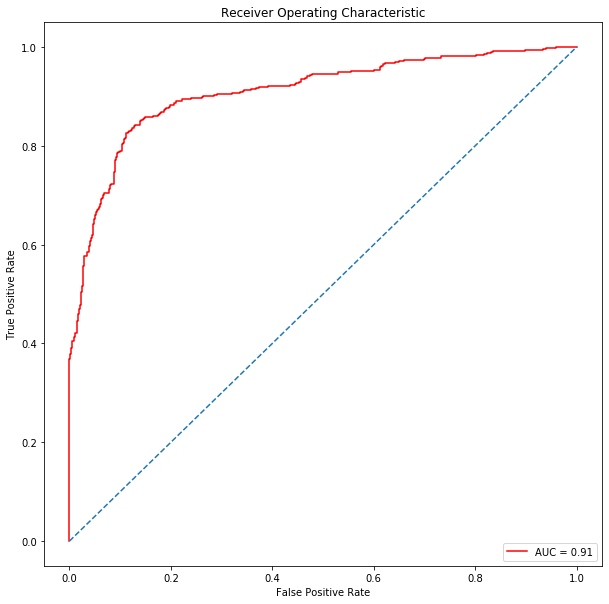

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
